## Neural Networks (Deep Learning)


A family of algorithms known as neural networks has recently seen a revival under
the name “deep learning.” While deep learning shows great promise in many machine
learning applications, deep learning algorithms are often tailored very carefully to a
specific use case. Here, we will only discuss some relatively simple methods, namely
multilayer perceptrons for classification and regression, that can serve as a starting
point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
also known as (vanilla) feed-forward neural networks, or sometimes just neural
networks.

### The neural network model

MLPs can be viewed as **generalizations of linear models** that perform multiple stages
of processing to come to a decision.

Remember that the prediction by a linear regressor is given as:


ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b


In plain English, ŷ is a weighted sum of the input features x[0] to x[p], weighted by
the learned coefficients w[0] to w[p]. We could visualize this graphically as shown

In [3]:
import sys
!{sys.executable} -m pip install  graphviz


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


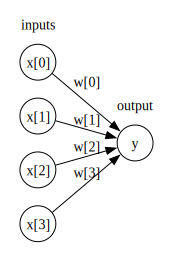

In [4]:
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
display(mglearn.plots.plot_logistic_regression_graph())


Here, each node on the left represents an input feature, the connecting lines represent
the learned coefficients, and the node on the right represents the output, which is a
weighted sum of the inputs.

In an MLP this process of computing weighted sums is **repeated multiple times**, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums to yield the final result 

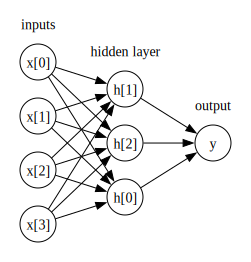

In [6]:
display(mglearn.plots.plot_single_hidden_layer_graph())

#### This model has a lot more coefficients (also called weights) to learn:

there is one between every input and every hidden unit (which make up the hidden layer), and
one between every unit in the hidden layer and the output.

Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick.

***After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result—usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh).*** The result of
this function is then used in the weighted sum that computes the output, ŷ. The two
functions are visualized in Figure 2-46. The relu cuts off values below zero, while tanh
saturates to –1 for low input values and +1 for high input values. Either nonlinear
function allows the neural network to learn much more complicated functions than a
linear model could:

#### this activation function only introduced the non linearity to help the model to learn more complex feature

Text(0, 0.5, 'relu(x), tanh(x)')

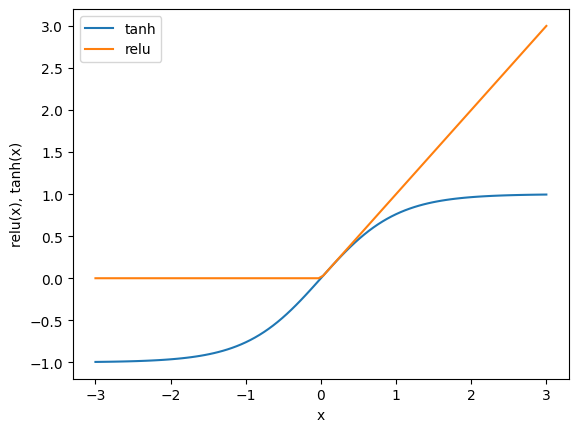

In [11]:
import numpy as np
import matplotlib.pyplot as plt
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")


Even thought the values of hidden layers are constrained to a range like 0,1 or +1 and -1 the key lies in the repeated applicaion of this process accross multiple hidden layers. Each layers refines and trasnfer the information

For the small neural network, the full formula for computing
ŷ in the case of regression would be (when using a tanh nonlinearity):


h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])


h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])


h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])


ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]


Here, w are the weights between the input x and the hidden layer h, and v are the
weights between the hidden layer h and the output ŷ. **The weights v and w are learned from data**, x are the input features, ŷ is the computed output, and h are intermediate
computations.

##### An important parameter that needs to be set by the user is the number of nodes in the hidden layer. This can be as small as 10 for very small or simple data‐sets and as big as 10,000 for very complex data. It is also possible to add additional hidden layers

#### with 2 hidden layers

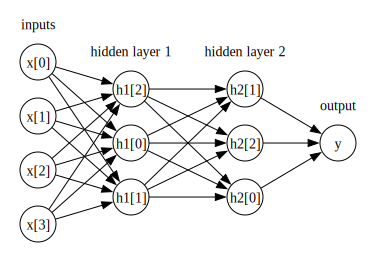

In [12]:
mglearn.plots.plot_two_hidden_layer_graph()

***Having large neural networks made up of many of these layers of computation is what inspired the term “deep learning.”***

### Tuning neural networks

Let’s look into the workings of the MLP by applying the MLPClassifier to the
two_moons dataset we used earlier

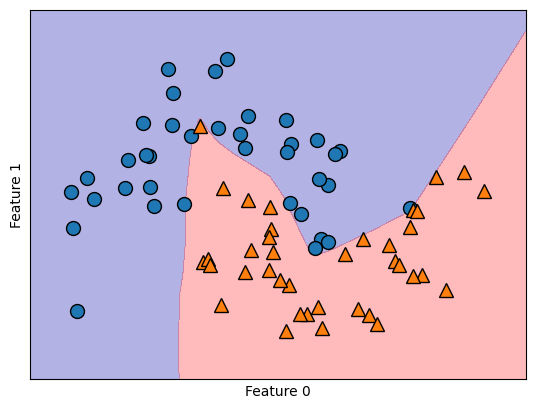

In [18]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import mglearn
import matplotlib.pyplot as plt

# Create a dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create and train the MLPClassifier
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train, y_train)

# Plot decision boundary
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


As you can see, the neural network learned a very nonlinear but relatively smooth
decision boundary. We used algorithm='l-bfgs'

L-BFGS stands for Limited-memory Broyden-Fletcher-Goldfarb-Shanno. It is an optimization algorithm used for solving unconstrained nonlinear optimization problems. 


***By default, the MLP uses 100 hidden nodes***, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good resul

#### Using only 10 hidden layers

Text(0, 0.5, 'Feature 1')

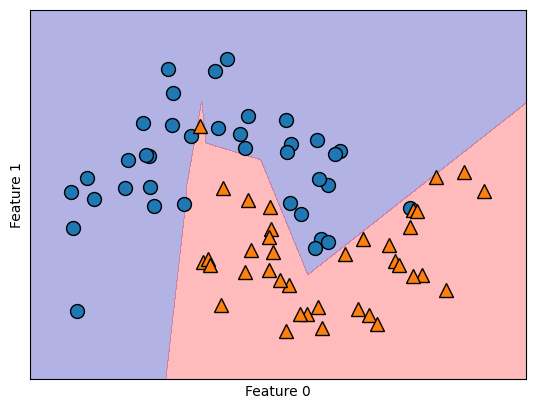

In [20]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With only 10 hidden units, the decision boundary looks somewhat more ragged. The
default nonlinearity is relu, shown. With a single hidden layer, this
means the decision function will be made up of 10 straight line segments. 

#### If we want a smoother decision boundary, we could add more hidden units Here adding one more hidden layers

Text(0, 0.5, 'Feature 1')

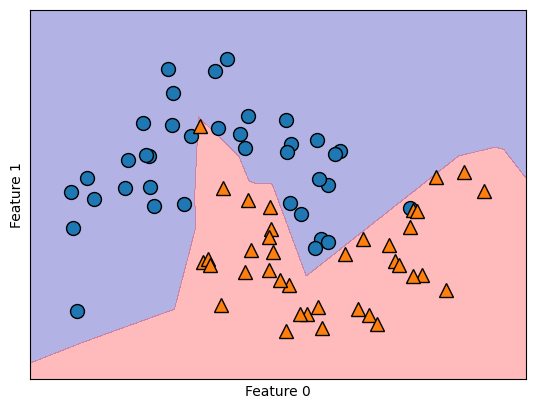

In [21]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Also we can use tanh nonlinearity for better result

Text(0, 0.5, 'Feature 1')

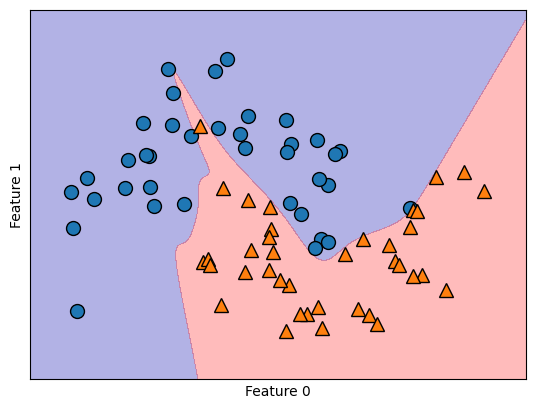

In [22]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


####  Controlling complexity with L2 penalty 

we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifiers. The parameter for this in the MLPClassifier is ***alpha*** (as in the linear regression models), and 
***it’s set to a very low value (little regularization) by default***. 

##### shows the effect of different values of alpha on the two_moons dataset, using two hidden layers of 10 or 100 units each:


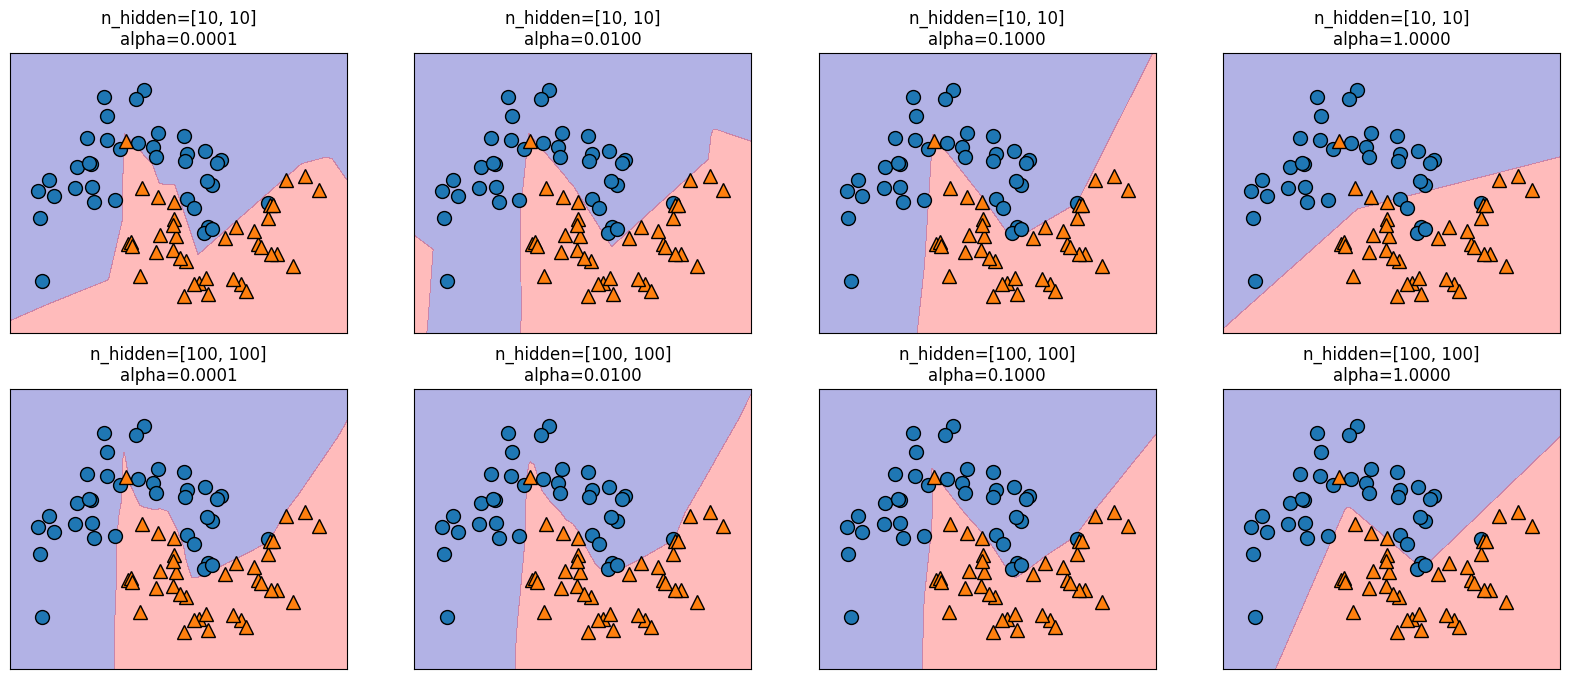

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
 for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0,
    hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
    alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
    n_hidden_nodes, n_hidden_nodes, alpha))


As you probably have realized by now, there are many ways to control the complexity
of a neural network: 

1. The number of hidden layers,
2. The number of units in each hidden layer,
3. The regularization (alpha). 

There are actually even more

====================================================================================

An important property of neural networks is that **their weights are set randomly before learning is started**
and this random initialization affects the model that is learned. 

That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds.
If the networks are large, and their complexity is chosen properly, this should not affect accuracy too
much, **but it is worth keeping in mind (particularly for smaller networks).**
Figshows plots of several models, all learned with the same settings of the parameters:

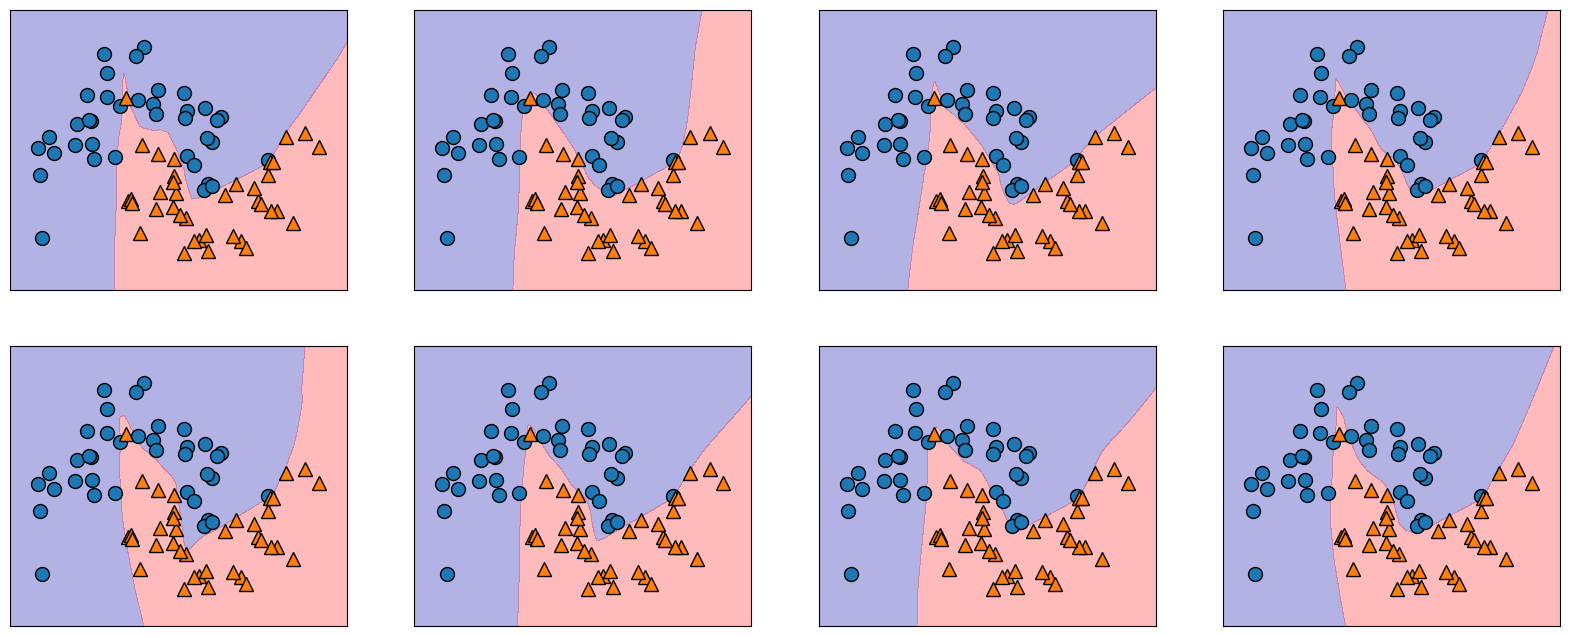

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
 mlp = MLPClassifier(solver='lbfgs', random_state=i,
 hidden_layer_sizes=[100, 100])
 mlp.fit(X_train, y_train)
 mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
 mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

#### Practical Example with Breast Cancer Dataset

To get a better understanding of neural networks on real-world data, let’s apply the
MLPClassifier to the Breast Cancer dataset. We start with the default parameters:

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. 

We must rescale our data so that it fulfills these requirements.

Again,
we will do this by hand here, but we’ll introduce the StandardScaler to do this auto‐
matically

In [30]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [31]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Increasing the number of iterations only increased the training set performance, not
the generalization performance. Still, the model is performing quite well.

As there is some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. Here,

we choose to increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
regularization of the weights:


In [32]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


***This leads to a performance on par with the best models so far***